In [163]:
# JEM207 Python Project

import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  

# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [164]:
print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


In [165]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [166]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [167]:
"""
DESCRIPTIVE STATISTICS:
age: Age of the patient
sex: Sex of the patient (Male, Female)
cp: Chest pain type (Categorical with 4 levels-Type 1, Type 2, Type 3 and Type 4) Type 1:typical angina Type 2:atypical angina Type 3:non-anginal pain Type 4:asymptomatic
trestbps: Resting blood pressure-in mm Hg on admission to the hospital(Continuous)
chol: Serum cholesterol in mg/dl (Continuous)
fbs: Fasting blood sugar > 120 mg/dl (True,False)
restecg: Resting electrocardiographic results (N(Normal), L1(Level 1), L2(Level 2))
thalach: Maximum heart rate achieved (Continuous)
exang: Exercise induced angina (Yes, No)
oldpeak: ST depression induced by exercise relative to rest (Continuous)
slope: The slope of the peak exercise ST segment (Up, Flat, Down)
ca: Number of major vessels (0-3) colored by flourosopy (0, 1, 2, 3)
thal: The heart status as retrieved from Thallium test (N(normal),FD(fixed defect), RD(reversible defect)
"""
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [168]:
y.describe()

,num
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


In [169]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


In [170]:
y.head(10)

,num
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1


In [171]:
base_df = pd.concat([X,y], axis=1)

In [198]:
df = base_df.copy()
#df = pd.merge(X,y,left_index=True,right_index=True)
df = df.rename(columns={"num":"target"})
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [199]:
for column in range(len(df.columns)):
    print("Total NA values for the column",df.columns[column], df[df.columns[column]].isna().sum())

Total NA values for the column age 0
Total NA values for the column sex 0
Total NA values for the column cp 0
Total NA values for the column trestbps 0
Total NA values for the column chol 0
Total NA values for the column fbs 0
Total NA values for the column restecg 0
Total NA values for the column thalach 0
Total NA values for the column exang 0
Total NA values for the column oldpeak 0
Total NA values for the column slope 0
Total NA values for the column ca 4
Total NA values for the column thal 2
Total NA values for the column target 0


In [200]:
for column in range(len(df.columns)):
    print("Total NA values for the column",df.columns[column], sum(df[df.columns[column]].apply(np.isnan)))

Total NA values for the column age 0
Total NA values for the column sex 0
Total NA values for the column cp 0
Total NA values for the column trestbps 0
Total NA values for the column chol 0
Total NA values for the column fbs 0
Total NA values for the column restecg 0
Total NA values for the column thalach 0
Total NA values for the column exang 0
Total NA values for the column oldpeak 0
Total NA values for the column slope 0
Total NA values for the column ca 4
Total NA values for the column thal 2
Total NA values for the column target 0


In [201]:
df.ca = df.ca.fillna(df.ca.mean())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [203]:
df.dropna(axis=0,how="any",inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [205]:
# thal values can get 3,6 or 7
df.thal.unique()

array([6., 3., 7.])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

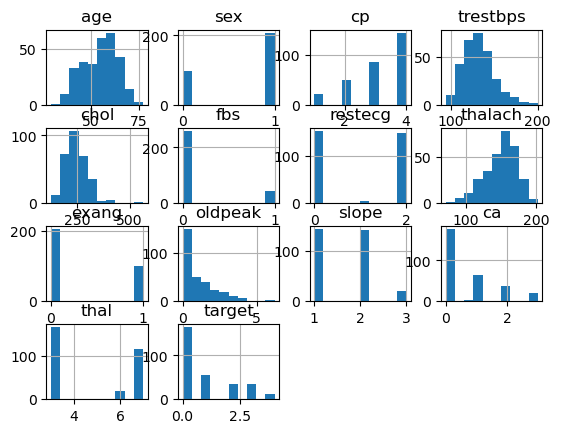

In [177]:
df[df.columns].hist()

In [212]:
# chol= Serum Cholesterol
"""
Normal cholesterol: 49 patients
Borderline high: 96 patients
High cholesterol: 156 patients
"""
len(df[df.chol < 200])
len(df[(df.chol >= 200) & (df.chol < 240)] )

96

In [88]:
"""
target: Has values for 5 different outcomes. 
0: Healthy,
1: Asymptomatic (Stage-1),
2: Mild-moderate to severe claudication (Stage-2),
3: Ischemic rest pain (Stage-3),
4: Ulcers or cangrene(Stage-4)
"""
df.target.unique()
df.target.value_counts(normalize=True)

0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: target, dtype: float64

In [87]:
pd.crosstab(df.fbs,df.target)

target,0,1,2,3,4
fbs,,,,,
0,141,51,27,27,12
1,23,4,9,8,1


In [104]:
len(df[df.thalach > df.thalach.mean()])


171